Реализуем бинарную классификацию записей голосов (мужских и женских) на основе характеристик записей их разговоров. Данные можно взять здесь

В предложенном датасете есть ряд свойств, определенных по аудиозаписям:

meanfreq: средняя частота голоса (в кГц)

sd: стандартное отклонение частоты голоса

median: медианная частота (в кГц)

Q25: значение в первом квартиле (в кГц)

Q75: значение в третьем квартиле (в кГц)

IQR: интерквартильный размах (в кГц)

skew: ассиметрия

kurt: эксцесс

sp.ent: спектральная энтропия

sfm: энтропия Винера

mode: мода частоты

centroid: частотный центроид

meanfun: средняя основная частота, измеренная по акустическому сигналу

minfun:  минимальная основная частота, измеренная по акустическому сигналу

maxfun: максимальная основная частота, измеренная в акустическом сигнале

meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу

mindom: минимум доминирующей частоты, измеренной в акустическом сигнале

maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале

dfrange: диапазон доминантных частот, измеренное на звуковой сигнал

modindx: индекс модуляции голоса

Прежде, чем проводить анализ, можно с помощью визуализации оценить, есть ли различия в частотах голосов мужчин и женщин. Можем построить распределения, например, средних частот:

Красному цвету соответствуют данные для женских голосов, голубому - для мужских. В целом, можно отметить, что распределение частот женских голосов сдвинуто вправо относительно распределения мужских. То есть, характеристики для голосов различаются, попробуем теперь реализовать классификацию на их основе.

Попробуйте подстроить модель, предсказывающую пол обладателя записи голоса.

Для этого:

1) Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42

2)Нормализуйте признаки с помощью функции StandardScaler() , для обучающей и тестовой выборки по отдельности!

3)Обучите модель логистической регрессии на подготовленных данных

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [66]:
data = pd.read_csv("./data/voiceDataSet.csv", encoding = 'ISO-8859-1', low_memory = False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [26]:
data_male = data[data['label'] == 'male']
data_female = data[data['label'] == 'female']


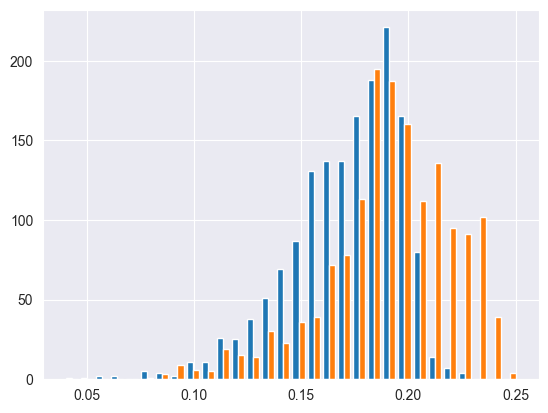

In [27]:
plt.hist([data_male['meanfreq'], data_female['meanfreq']], bins=30);

In [67]:
data_data = data.drop(['label'], axis = 1, inplace = False)


# 7.13.1

Вычислите значение метрики accuracy и введите полученное значение. Запишите ответ с тремя знаками после запятой.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = data_data
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(x_train)
X_test_scaler = scaler.fit_transform(x_test)

lr = LogisticRegression()
lr.fit(X_train_scaler, y_train)

y_pred = lr.predict(X_test_scaler)


acc = accuracy_score(y_test, y_pred)


print(acc, round(acc, 3))




0.9737118822292324 0.974


Теперь познакомимся с новым алгоритмом классификации, а также снова потренируемся делить выборку и осуществлять кросс-валидацию. Кроме того, посмотрим, как можно оценить качество классификации для случая, когда наша классификация не бинарная, т.е. у нас несколько классов.

В данном кейсе мы попробуем определять типы стекла по его характеристикам. Данные можно взять здесь

Откроем данные и увидим, что в первых столбцах показатели содержания различных веществ в стекле, а в последнем (Type) - непосредственно тип стекла.

In [127]:
data = pd.read_csv("./data/glass.csv", encoding = 'ISO-8859-1', low_memory = False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Наша классификация мультиклассовая, поэтому мы должны посмотреть, сколько у нас классов. Если вы вообще ничего не знаете о задаче в плане количества классов, обязательно начинайте с этого. Так как это влияет на ход решения. Особенно важно понять, бинарная классификация или нет.

# 7.13.2

Сколько классов стекла представлено в данной задаче?

In [79]:
data.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


Итак, мы выяснили, сколько у нас классов и узнали, что у нас будет в этот раз не бинарная классификация. А значит, некоторые метрики качества (например, precision  и recall) мы не сможем использовать.

Приступим непосредственно к построению модели. На примере этой задачи мы узнаем новый алгоритм knn (метод ближайших соседей). Это один из простейших методов классификации.

Воспользуемся k-fold валидацией на 5 разбиениях и обучим модель:

In [129]:
x = data.drop(['Type'], axis = 1, inplace = False)
y = data['Type']


In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)

res = cross_val_score(model, x, y, cv=kf, scoring="accuracy").mean()

round(res, 2)

0.37

# 7.13.4

Предположим, к нам поступило новое стекло с известными параметрами. Какой номер класса присвоет ему наш алгоритм, если вектор признаков стекла [1.5, 12.3, 4.2, 1.3, 72.7, 0.57, 7.4, 0, 0] ?

In [154]:
x_new = pd.DataFrame([[1.5, 12.3, 4.2, 1.3, 72.7, 0.57, 7.4, 0, 0]])

model.fit(x, y)

model.predict(x_new)



C:\PythonProject\skillfactory мат анализ\.venv1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)